In [1]:
import requests
import pandas as pd

In [2]:
response = requests.get('https://web.byui.edu/studentemployment/api/jobs')

data_json = response.json()

data = pd.DataFrame(data_json)

In [3]:
pd.options.display.max_columns = None

## Top 5 highest paid jobs

In [4]:
data.sort_values('payRate', ascending=False).head(5)[['title','payRate','workSchedule']]

,title,payRate,workSchedule
186,Stores and Receiving Delivery Driver,11.58,8am - 12pm
192,Health Center Lab Assistant,11.50,NaN
42,CIT112 OnlineTA,11.30,
27,CIT160 OnlineTA,11.30,Flexible
308,CITBC102 OnlineTutor,11.30,Flexible


## All Jobs that are not 'Online','TA', and 'Custodial'

In [5]:
print(f'''There are {data[~data.title.str.contains('TA|Custodian|Online')].shape[0]} jobs that are not Online, TA, not custodial''')

data[~data.title.str.contains('TA|Custodian|Online')].sort_values('payRate', ascending=False)[['title','payRate','workSchedule']]

There are 38 jobs that are not Online, TA, not custodial


,title,payRate,workSchedule
186,Stores and Receiving Delivery Driver,11.58,8am - 12pm
192,Health Center Lab Assistant,11.50,NaN
174,Degree Verification Mid Shift,10.70,11 AM-2 PM M-F
169,University Aid Processing Specialist,10.50,Somewhat flexible. Minimum 20 hours per week.
5,Email Specialist,10.40,1pm-5pm
4,Chat Specialist,10.40,"7am-10am, 10am-1pm"
172,Food Services Student Jobs,10.00,Many Shifts Available
162,Data Entry - Alumni,10.00,Flexible - M-F 8-5 pm
372,Student Project Manager,10.00,Varies
356,Systems & Innovation: Product Specialist,9.60,"Monday-Saturday (7 AM to 10 PM, flexible shifts)"


In [15]:
data.dateUpdated = data.dateUpdated.dt.time

<AxesSubplot:xlabel='dateUpdated'>

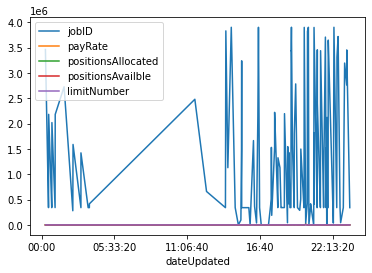

In [17]:
data.set_index('dateUpdated').plot()